In [1]:
# Python dependencies 
import matplotlib.pyplot as plt
import matplotlib.colors as col
import numpy as np

from scipy.optimize  import curve_fit
from scipy.special   import erf, betainc, gamma
from scipy           import asarray as ar,exp
from numpy.random    import uniform
from scipy           import stats
from scipy.integrate import simps

from root_pandas import read_root 

# External Dependencies
from ROOT import TFile, TTree

# My Dependencies
from Data      import *
from Helper    import *

/home/jcordero/anaconda3/lib/python3.6/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.14.3 is currently installed but you installed root_numpy against numpy 1.12.1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

# Analysis

In [3]:
DataGen = 'rereco'
#DataGen = 'legacy'

selection = 'mumug'
#selection = 'elelg'

#SampleSet = 'HZG'
#SampleSet = 'WithMuonVeto'
#SampleSet = 'WithWJets'
SampleSet = 'MatchZGpaper'
#SampleSet = 'ReRun'
#SampleSet = 'Z'
path,figpath = {},{}
path[DataGen]    = "/home/jcordero/CMS/data_2016/"+DataGen+"/SMP_ZG/Files/"+selection+"/"+SampleSet+"/"
figpath[DataGen] = "/home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/"+DataGen+"/"+selection+"/"

DataGen = 'legacy'
path[DataGen]    = "/home/jcordero/CMS/data_2016/"+DataGen+"/SMP_ZG/Files/"+selection+"/"+SampleSet+"/"
figpath[DataGen] = "/home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/"+DataGen+"/"+selection+"/"

Help    = Helper()

In [4]:
DoubleLepton = {}
# --------------------------------------
#  Data
# ---------------------------------------


run = ['B','C','D','E','F','G','H']
for dg in ['legacy','rereco']:
    print('--------------------------------------')
    print('--------------' + dg + '-----------------')
    if selection   == 'mumug':
        DoubleLepton[dg] = [Data(path[dg]+"DoubleMuon/","DoubleMuon_2016",trigger = r,data=True) for r in run]
    elif selection == 'elelg':
        DoubleLepton[dg] = [Data(path[dg]+"DoubleEG/","DoubleEG_2016",trigger = r,data=True) for r in run]

--------------------------------------
--------------legacy-----------------
----------------- DATA --------------------------
Opening    File::/home/jcordero/CMS/data_2016/legacy/SMP_ZG/Files/mumug/MatchZGpaper/DoubleMuon/output_DoubleMuon_2016B_v.root
Opening    tree::   tree_DoubleMuon_2016B
-------------------------------------------------
----------------- DATA --------------------------
Opening    File::/home/jcordero/CMS/data_2016/legacy/SMP_ZG/Files/mumug/MatchZGpaper/DoubleMuon/output_DoubleMuon_2016C_v.root
Opening    tree::   tree_DoubleMuon_2016C
-------------------------------------------------
----------------- DATA --------------------------
Opening    File::/home/jcordero/CMS/data_2016/legacy/SMP_ZG/Files/mumug/MatchZGpaper/DoubleMuon/output_DoubleMuon_2016D_v.root
Opening    tree::   tree_DoubleMuon_2016D
-------------------------------------------------
----------------- DATA --------------------------
Opening    File::/home/jcordero/CMS/data_2016/legacy/SMP_ZG/Files/

In [5]:
Leptons = {}
for dg in ['legacy','rereco']:
    print('--------------------------------------')
    print('--------------' + dg + '-----------------')
    Leptons[dg] = DoubleLepton[dg][0]
    for i in np.arange(len(DoubleLepton[dg][1:])):
        Leptons[dg] =   Leptons[dg] + DoubleLepton[dg][1]
        #del DoubleLepton[dg][1]

--------------------------------------
--------------legacy-----------------
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
-----------------------------------------------

In [7]:
for k in Leptons:
    print(len(Leptons[k].df.photonOnePt))

233559
230753


In [6]:
'''
trigger = "_v"

# ---------------------------------------
# Signal
# ---------------------------------------
ZG = Data(path + "ZGToLLG/", "ZGToLLG", trigger)
#ZG = Data(path + "ZG_ZToLL/", "ZG_ZToLL", trigger)

# ---------------------------------------
# Background
# ---------------------------------------
trigger = "_v"
#TT          = Data(path +          "TT/",         "TT", trigger)
TT          = Data(path +   "TTTo2L2Nu/",  "TTTo2L2Nu", trigger)
DYJets      = Data(path +      "DYJets/",     "DYJets", trigger)

WJets      = Data(path + "WJets/","WJets", trigger)
#W1Jets      = Data(path + "W1JetsToLNu/","W1JetsToLNu", trigger)
#W2Jets      = Data(path + "W2JetsToLNu/","W2JetsToLNu", trigger)
#W3Jets      = Data(path + "W2JetsToLNu/","W3JetsToLNu", trigger)
#W4Jets      = Data(path + "W3JetsToLNu/","W4JetsToLNu", trigger)

WWTo2L2Nu   = Data(path +   "WWTo2L2Nu/",  "WWTo2L2Nu", trigger)

ZZTo2L2Nu   = Data(path +   "ZZTo2L2Nu/",  "ZZTo2L2Nu", trigger)
ZZTo2L2Q    = Data(path +    "ZZTo2L2Q/",   "ZZTo2L2Q", trigger)
ZZTo4L      = Data(path +      "ZZTo4L/",     "ZZTo4L", trigger)

WZTo2L2Q    = Data(path +    "WZTo2L2Q/",   "WZTo2L2Q", trigger)
WZTo3LNu    = Data(path +    "WZTo3LNu/",   "WZTo3LNu", trigger)

#ZG_veto      = Data(path +      "DYJets/",     "DYJets", trigger)
# ---------------------------------------
# Understanding the Z Peak
#ZPeak = Data("ZPeak_WminusH_HToZG_WToAll/", "ZPeak_WminusH_","HLT_IsoMu24_v")
''';

-------------------- MC -----------------------
Opening    File::/home/jcordero/CMS/data_2016/rereco/SMP_ZG/Files/mumug/MatchZGpaper/ZGToLLG/output_ZGToLLG_v_0.root
Opening    tree::   tree_zgtollg
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::/home/jcordero/CMS/data_2016/rereco/SMP_ZG/Files/mumug/MatchZGpaper/TTTo2L2Nu/output_TTTo2L2Nu_v_0.root
Opening    tree::   tree_ttto2l2nu
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::/home/jcordero/CMS/data_2016/rereco/SMP_ZG/Files/mumug/MatchZGpaper/DYJets/output_DYJets_v_0.root
Opening    tree::   tree_dyjets
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::/home/jcordero/CMS/data_2016/rereco/SMP_ZG/Files/mumug/MatchZGpaper/WJets/output_WJets_v_0.root
Opening    tree::   tree_wjets
-----------------------------------------------
-------------------

In [7]:
print(' +++ Merging Data Samples')
#Leptons = DoubleLepton[0] + DoubleLepton[1] + DoubleLepton[2] + DoubleLepton[3] + DoubleLepton[4] + DoubleLepton[5] + DoubleLepton[6]

print(' +++ Merging MC Samples')
#WJets = W1Jets + W2Jets + W3Jets + W3Jets

WW = WWTo2L2Nu
ZZ = ZZTo2L2Nu + ZZTo2L2Q + ZZTo4L
WZ = WZTo2L2Q + WZTo3LNu

VV = WWTo2L2Nu + ZZTo2L2Nu + ZZTo2L2Q + ZZTo4L + WZTo2L2Q + WZTo3LNu



print('--Done')

 +++ Merging Data Samples
 +++ Merging MC Samples
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
-----------------------------------------------
-------------------- MC --

In [8]:
'''
for d in DATAS:
    print('---------',d.name)
    print(d.df.head())
''';

In [9]:
dataSelect = 'ALL'
#dataSelect = 'DY Only'
#dataSelect = 'DYVeto'
#dataSelect = 'DY ZG'
#dataSelect = 'DY ZG Comp'


if   dataSelect == 'ALL':
    data        = [  WJets,         VV,     TT,   DYJets,        ZG,      Leptons]
    listSamples = [ 'WJets',      'VV',   'TT', 'DYJets',      'ZG', 'DoubleMuon']
    legend      = [ 'WJets',      'VV',   'TT', 'DYJets',      'ZG', 'DoubleMuon']
    colors      = [     'b',    'cyan',    'r', 'purple', 'magenta',          'k']
    dataFlag    = [   False,     False,  False,    False,     False,         True]
    combFlag    = [   False,     False,  False,    False,     False,         True]
elif dataSelect == 'VV Separate':
    data        = [  DYJets,   WJets,       TT,       WW,      ZZ,       WZ,       ZG,    Leptons]
    listSamples = ['DYJets', 'WJets',      'TT',    'WW',    'ZZ',     'WZ',      'ZG', 'DoubleMuon']
    legend      = ['DYJets', 'WJets',      'TT',    'WW',    'ZZ',     'WZ',      'ZG', 'DoubleMuon']
    colors      = [  'cyan',     'r',  'purple',    'grey',  'teal', 'orange', 'magenta',          'k']
    dataFlag    = [   False,   False,     False,   False,   False,    False,     False,         True]
    combFlag    = [   False,   False,     False,   False,   False,    False,     False,         True]
elif dataSelect == 'DY Only':    
    data        = [  DYJets,   WJets,       TT,       WW,      ZZ,       WZ,       Leptons]
    listSamples = ['DYJets', 'WJets',     'TT',    'WW',    'ZZ',     'WZ',       'DoubleMuon']
    legend      = ['DYJets', 'WJets',     'TT',    'WW',    'ZZ',     'WZ',       'DoubleMuon']
    colors      = [  'cyan',     'r', 'purple',  'grey',  'teal', 'orange',       'k']
    dataFlag    = [   False,   False,    False,   False,   False,    False,       True]
    combFlag    = [   False,   False,    False,   False,   False,    False,       True]
elif dataSelect == 'DYVeto':
    data        = [  DYJets,   WJets,       TT,       WW,      ZZ,       WZ,       ZG_veto,    Leptons]
    listSamples = ['DYJets', 'WJets',      'TT',    'WW',    'ZZ',     'WZ',      'ZG', 'DoubleMuon']
    legend      = ['DYJets', 'WJets',      'TT',    'WW',    'ZZ',     'WZ',      'ZG', 'DoubleMuon']
    colors      = [  'cyan',     'r',  'purple',    'grey',  'teal', 'orange', 'magenta',          'k']
    dataFlag    = [   False,   False,     False,   False,   False,    False,     False,         True]
    combFlag    = [   False,   False,     False,   False,   False,    False,     False,         True]
elif dataSelect == 'DY ZG':
    data        = [  DYJets,      ZG,    Leptons]
    listSamples = ['DYJets',      'ZG', 'DoubleMuon']
    legend      = ['DYJets',      'ZG', 'DoubleMuon']
    colors      = [  'cyan',      'magenta',          'k']
    dataFlag    = [   False,     False,         True]
    combFlag    = [   False,     False,         True]
elif dataSelect == 'DY ZG Comp':    
    data        = [  ZG_veto,      ZG,    Leptons]
    listSamples = ['DYJets',      'ZG', 'DoubleMuon']
    legend      = ['DYJets',      'ZG', 'DoubleMuon']
    colors      = [  'cyan',      'magenta',          'k']
    dataFlag    = [   False,     False,         True]
    combFlag    = [   False,     False,         True]

ind = []
for i in range(len(data)):
    if len(data[i].df.columns) <= 1:
        continue
    else: 
        ind.append(i)

data        = [data[i]        for i in ind]
listSamples = [listSamples[i] for i in ind]
legend      = [legend[i]      for i in ind]
colors      = [colors[i]      for i in ind]
dataFlag    = [dataFlag[i]    for i in ind]
combFlag    = [combFlag[i]    for i in ind]

for i in range(len(data)):
    print(i,data[i].name,colors[i])    

0 WWTo2L2Nu cyan
1 DYJets purple
2 ZGToLLG magenta
3 DoubleMuon_2016 k


# ReWeight

In [10]:
def GetMCPU():
    ########### MC Scenario ##################
    PU = np.array([
                    0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
                    11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
                    21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 
                    31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 
                    41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 
                    51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 
                    61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
                    71, 72, 73, 74]
                    )
    PUmc = np.array([
                    1.78653e-05 ,2.56602e-05 ,5.27857e-05 ,8.88954e-05 ,
                    0.000109362 ,0.000140973 ,0.000240998  ,0.00071209  ,
                    0.00130121  ,0.00245255  ,0.00502589   ,0.00919534  ,
                    0.0146697   ,0.0204126   ,0.0267586    ,0.0337697   ,
                    0.0401478   ,0.0450159   ,0.0490577    ,0.0524855   ,
                    0.0548159   ,0.0559937   ,0.0554468    ,0.0537687   ,
                    0.0512055   ,0.0476713   ,0.0435312    ,0.0393107   ,
                    0.0349812   ,0.0307413   ,0.0272425    ,0.0237115   ,
                    0.0208329   ,0.0182459   ,0.0160712    ,0.0142498   ,
                    0.012804    ,0.011571    ,0.010547     ,0.00959489  ,
                    0.00891718  ,0.00829292  ,0.0076195    ,0.0069806   ,
                    0.0062025   ,0.00546581  ,0.00484127   ,0.00407168  ,
                    0.00337681  ,0.00269893  ,0.00212473   ,0.00160208  ,
                    0.00117884  ,0.000859662 ,0.000569085  ,0.000365431 ,
                    0.000243565 ,0.00015688  ,9.88128e-05  ,6.53783e-05 ,
                    3.73924e-05 ,2.61382e-05 ,2.0307e-05   ,1.73032e-05 ,
                    1.435e-05   ,1.36486e-05 ,1.35555e-05  ,1.37491e-05 ,
                    1.34255e-05 ,1.33987e-05 ,1.34061e-05  ,1.34211e-05 ,
                    1.34177e-05 ,1.32959e-05 ,1.33287e-05]
                    )
    
    return PU,PUmc

def GetDataPU(xsec='69p2'):
    pileupFile = 'pileup_sf_2016_'+xsec+'mb.root'
    file = TFile('/home/jcordero/CMS/data_2016/'+DataGen+'/SMP_ZG/Files/'+pileupFile)
    puTree = file.Get('pileup')
    PUdata = []
    for pu in puTree:
        PUdata.append(pu)
    return PUdata

In [11]:
def GetPUweight(xsec='69p2'):
    
    ### Get Distributions ##
    PU,PUmc= GetMCPU()
    PUdata = GetDataPU(xsec)
    
    ### Normalize ###
    PUmc   = np.array(PUmc)/sum(PUmc)        
    PUdata = np.array(PUdata)/sum(PUdata)
    
    return PU,PUdata/PUmc,PUdata,PUmc,

In [12]:
def SF_ratio(
             xsec1='65',
             xsec2='69p2',
            ):
    pu,r1,r1d,r1m = GetPUweight(xsec = xsec1)
    pu,r2,r2d,r2m = GetPUweight(xsec = xsec2)
    rScale = r1/r2
    rScale[np.isnan(rScale)] = np.ones(sum(np.isnan(rScale)))

    puWeight = []
    for d in data[:-1]:
        puW = np.ones(len(d.df.nPU))
        print('--------------',d.name)
        print(len(d.df.nPU))
        for i in range(len(pu)-2):
            mask = np.logical_and(np.array(d.df.nPU) > pu[i], np.array(d.df.nPU) <= pu[i+1])        
            puW[mask] = np.ones(sum(mask))*rScale[i]
        puWeight.append(puW)
    return puWeight

# Lower Level Plotting Functions

In [13]:
def GET_RangeBins(Ks):
    if len(Ks)>2:
        part,var,ph = Ks[0],Ks[2],'_'+Ks[1]
    else:
        part,var,ph= Ks[0],Ks[1],''
    
    if var == 'nJets':
        ranges = [0,7]
        bins   = 7
    else:
        ranges = Help.plotOpsAll[0]['range'][var][part+ph]
        bins   = Help.plotOpsAll[0]['bins'][var][part+ph]

    return ranges,bins

def GET_WeiVAR(Ks,weightCorrection = True):
    if len(Ks)>2:
        part,var,ph = Ks[0],Ks[2],'_'+Ks[1]
    else:
        part,var,ph= Ks[0],Ks[1],''
     
    
    if weightCorrection:
        # MODIFICATIONS
        #wei = [reWeight[i][data[i].cuts]*1.1 for i in range(len(data[:-1]))]
        #wei.append(data[-1].GetWithCuts('weight'))
        
        wei = [np.array(reWeight[i][data[i].cuts])/(np.array(data[i].df.photonIDWeight)[data[i].cuts]) for i in range(len(data[:-1]))]
        wei.append(data[-1].GetWithCuts('weight')//(np.array(data[-1].df.photonIDWeight)[data[-1].cuts]))
    else:
        # ORIGINAL
        wei = [d.GetWithCuts('weight') for d in data]
    
    VAR = [d.GetWithCuts(part+var+ph) for d in data]        
        
    return wei,VAR

In [14]:
def PlotDataMC(
                ax,
                lims,
                Data,Sig,Bkg,
                ranges,bins,mag=1,
                signalInclude=True,
                log = False,
                ):

    if not signalInclude:
        h = Bkg[1]+Sig[1]/mag
        rDataMC = Data[1]/(Bkg[1]+Sig[1]/mag) - 1 
    else:
        h = np.array(Bkg[1])
        rDataMC = Data[1]/Bkg[1] - 1 

    ax.errorbar(
                Data[0], rDataMC,
                yerr      = Data[1]/h*np.sqrt(1/Data[1]+1/h),
                color     = 'k',
                marker    = 'o',
                linestyle = '',
                linewidth = 1.5
               )    
    plt.grid(linestyle='--')
    
    ax.set_ylabel(r'$\frac{Data}{MC}-1$')
    ax.set_xlim(lims[0])
    ax.set_ylim(lims[1])
    if log:
        ax.set_yscale('log')

In [15]:
def PlotData(
            ax,
            Data,
            ranges,
            bins,
            log = False,
            ):

    y3,x3 =np.histogram(
                        Data,
                        range    = ranges,
                        bins     = bins,
                       )
    x3b = (x3[1:len(x3)] + x3[0:-1])/2
    ax.errorbar(x3b,
                y3,
                xerr      = np.diff(x3)/2,yerr = np.sqrt(y3),
                color     ='k',
                marker    ='o',
                linestyle ='',
                label     = legend[-1]
               )
    ax.legend(prop={'size': 10})
    
    xlim = ax.get_xlim()
    ax.set_ylabel('# Counts')
    #ax.set_xlabel(var)
    #plt.legend()
    if log:
        ax.set_yscale('log')
        
    return x3,np.array(y3),x3b,xlim

In [16]:
def Plot(var,
         part             =  '',
         signalInclude    = False,
         stacked          = True,
         density          = False,
         log              = False,
         weightCorrection = True,
        ):

    
    
    k = part+'_'+var
    Ks = k.split('_')
    
    ##########################
    
    ranges,bins = GET_RangeBins(Ks)
    wei, VAR    = GET_WeiVAR( Ks, weightCorrection=weightCorrection )
    
    ##########################
    
    if stacked:
        histtype = 'stepfilled'
    else:
        histtype = 'step'
        
    ##########################
    
    if not signalInclude:
        N = 2
    else:
        N = 1
        
    ###########################################################

    fig = plt.figure(figsize=(10,10))
    plt.subplot2grid((4,1),(0,0),rowspan = 3, colspan = 1)

    #for w,da in zip(wei,VAR):
    #    print(len(w),len(da))
    h_bg = plt.hist(
                    VAR[:-N],
                    range     = ranges,
                    bins      = bins,
                    histtype  = histtype,
                    stacked   = stacked,
                    weights   = wei[:-N],
                    label     = legend[:-N],
                    color     = colors[:-N],
                    density   = density,
                    linewidth = linewidth,
                    )

    plt.grid(linestyle='--')
    plt.legend()

    ##########################
    
    if stacked:
        if not signalInclude:
            h_sig = plt.hist(
                                VAR[-N],
                                range     = ranges,
                                bins      = bins,
                                histtype  = histtype,
                                stacked   = stacked,
                                label     = legend[-N]+" x"+str(mag),
                                color     = colors[-N],
                                weights   = np.array(wei[-N])*mag,
                                density   = density,
                                linewidth = 1.5,
                                )
        else:
            h_sig = h_bg[-N]
        ##########################
        if not density:
            #---------------------
            #---- Ploting the Data    
            #---------------------
            ax = plt.gca()
            x3,y3,x3b,xlim = PlotData(ax,VAR[-1],ranges,bins,log)
            ax.set_xlabel(var)
            #------------------------
            #---- Ploting the Data/MC    
            #-------------------------
            plt.subplot2grid((4,1),(3,0),rowspan = 1, colspan = 1)    
            ax = plt.gca()

            PlotDataMC(ax,
                       lims    = [xlim,[-0.5,0.5]],
                       Data    = [x3b,y3],
                       Bkg     = [x3b,h_bg[0][-1]],
                       Sig     = [x3b,h_sig[0]],
                       ranges  = ranges,
                       bins    = bins,
                      )

        
    plt.tight_layout()
    plt.show()
    fig.savefig(figpath+stackFol+'/'+var+'_'+part+stackLab+".png")
    
    try:
        return x3,y3,h_bg[0][-1],h_sig[0]
    except:
        return False

In [17]:
def Plot_Mult(var,
              part             = ['lepton1','lepton2','photon1','dilep','dilepgm'],
              signalInclude    = False,
              figDim           = [2,3],
              customRange      = False,
              stacked          = True,
              log              = False,
              weightCorrection = True,
             ):

    
    nx,ny = figDim[0],figDim[1]
    
    ##########################
    if not signalInclude:
        N = 2
    else:
        N = 1
    ##########################
    if stacked:
        histtype = 'stepfilled'
    else:
        histtype = 'step'
    ##########################
    
    htemp = []
    row,col =0 , 0
    
    
    fig = plt.figure(figsize = (6*ny, 6*nx))
    
    for j,k in zip(range(len(part)),part):    
        K = k+'_'+var
        Ks = K.split('_')
        
        if customRange:
            if var == 'pt':
                if k == 'leptonTwo':
                    ranges = [0,80]
                    bins = Help.plotOpsAll[0]['bins'][var][k]
                elif k == 'photonOne' or k == 'photonOne_EE' or k == 'photonOne_EB':
                    ranges = [0,80]
                    bins = 40
                else:
                    ranges = Help.plotOpsAll[0]['range'][var][k]
                    bins = Help.plotOpsAll[0]['bins'][var][k]
            elif var in ['Ich','Ineu','Iph']:
                ranges = [0.1,4]
                bins = 40
            elif var == 'M':
                if k in ['dilepton','dilepton_EE','dilepton_EB']:
                    ranges = [50,150]
                    bins = 40
                else:
                    bins = Help.plotOpsAll[0]['bins'][var][k]
                    ranges = Help.plotOpsAll[0]['range'][var][k]                                        
            else:
                #if Ks[1] in ['EE','EB']:
                if len(Ks) >1:
                    bins = Help.plotOpsAll[0]['bins'][var][Ks[0]]
                    ranges = Help.plotOpsAll[0]['range'][var][Ks[0]]
                else:
                    bins = Help.plotOpsAll[0]['bins'][var][k]
                    ranges = Help.plotOpsAll[0]['range'][var][k]                    

        else:
            bins   = Help.plotOpsAll[0]['bins'][var][k]
            ranges = Help.plotOpsAll[0]['range'][var][k]

        
        wei,VAR = GET_WeiVAR(Ks,weightCorrection)
        
        nx,ny = figDim[0],figDim[1]
        #plt.subplot(nx,ny,j+1)
        #plt.subplot2grid((4,2),(3,1),rowspan = 1, colspan = 1)    
        if j != 0:
            if j%ny == 0:
                row += 1
                col = 0  
        #print(nx,ny,j,row,col)
        ax = plt.subplot2grid((nx*4,ny),(row*4,col),rowspan = 3, colspan = 1)    
        title_lab = k        


    
        #for i in range(len(VAR)):
        #    print(Ks,len(VAR[i]),len(wei[i]))
        h_bg = ax.hist(
                        VAR[:-N],                            
                        histtype  = histtype,
                        range     = ranges,
                        bins      = bins,
                        stacked   = stacked,
                        color     = colors[:-N],
                        weights   = wei[:-N],
                        label     = legend,
                        density   = density,
                        linewidth = linewidth,
                        )
        htemp.append(h_bg)
        ax.set_title(title_lab)
        ax.set_xlabel(var)
        ax.grid(linestyle='--')
        ax.legend(prop={'size':10})

        #----------------------------------------------------------------
        #----------------------------------------------------------------
        if stacked:
            if not signalInclude:
                h_sig = ax.hist(
                                    VAR[-N],
                                    bins      = bins,
                                    range     = ranges,
                                    histtype  = Help.plotOpsAll[-N]['histtype'],
                                    stacked   = Help.plotOpsAll[-N]['stacked'],
                                    color     = colors[-N],
                                    weights   = wei[-N],
                                    label     = legend[-N] + "x"+str(mag),
                                    linewidth = 2
                                    )
                ax.legend(prop={'size': 10})
            else:
                h_sig = h_bg[0][-1]
            
            #---------------------
            #---- Ploting the Data    
            #---------------------
            ax = plt.gca()
            x3,y3,x3b,xlim = PlotData(ax,VAR[-1],ranges,bins,log)
            ax.set_xlabel(var)
            #------------------------
            #---- Ploting the Data/MC    
            #-------------------------
            ax1 = plt.subplot2grid((nx*4,ny),(row*4+3,col),rowspan = 1, colspan = 1)    

            PlotDataMC(ax1,lims=[xlim,[-0.5,0.5]],
                       Data=[x3b,y3],
                       Bkg=[x3b,h_bg[0][-1]],
                       Sig = [x3b,h_sig[0]],
                       ranges = ranges,
                       bins = bins,
                      )
            
        col+=1
        if log:
            ax.set_yscale('log')
        #########################################################
        
    
    fig.tight_layout()
    plt.show()
    fig.savefig(figpath+stackFol+'/Mult/'+var+stackLab+".png")

In [18]:
def Plot_Mult_DataMC(
                    var,
                    part          = ['lepton1','lepton2','photon1','dilep','dilepgm'],
                    signalInclude = False,
                    figDim        = [2,3],
                    customRange   = False,
                    stacked       = True,
                    log           = False,
                    ):
        
    
    nx,ny = figDim[0],figDim[1]
    ########
    if not signalInclude:
        N = 2
    else:
        N = 1
    #########   
    
    if nx > 3:
        fig = plt.figure(figsize = (18, 30))
    else:
        fig = plt.figure(figsize = (18, 15))
    
    
    for j,k in zip(range(len(part)),part):    
        Ks = k.split('_')
        
        if customRange:
            if var == 'Pt':
                if k == 'lepton2':
                    ranges = [0,80]
                    bins = Help.plotOpsAll[0]['bins'][var][k]
                elif k == 'photonOne' or k == 'photonOne_EE' or k == 'photonOne_EB':
                    ranges = [0,80]
                    bins = 40
                else:
                    ranges = Help.plotOpsAll[0]['range'][var][k]
                    bins = Help.plotOpsAll[0]['bins'][var][k]
            else:
                
                #if Ks[1] in ['EE','EB']:
                if len(Ks) >1:
                    bins = Help.plotOpsAll[0]['bins'][var][Ks[0]]
                    ranges = Help.plotOpsAll[0]['range'][var][Ks[0]]
                else:
                    bins = Help.plotOpsAll[0]['bins'][var][k]
                    ranges = Help.plotOpsAll[0]['range'][var][k]                    

        else:
            #print(var,k)
            bins   = Help.plotOpsAll[0]['bins'][var][k]
            ranges = Help.plotOpsAll[0]['range'][var][k]
        
        if len(Ks) > 1:
            if Ks[1] == 'EE' :
                wei = np.array([d.GetWithCuts('weight')[np.abs(d.GetWithCuts('photonOneEta')) >  1.48] for d in data])
                VAR = [d.GetWithCuts(Ks[0]+var)[np.abs(d.GetWithCuts('photonOneEta')) >  1.48] for d in data]
            elif Ks[1] == 'EB':
                wei = np.array([d.GetWithCuts('weight')[np.abs(d.GetWithCuts('photonOneEta')) <=  1.48] for d in data])
                VAR = [d.GetWithCuts(Ks[0]+var)[np.abs(d.GetWithCuts('photonOneEta')) <=  1.48] for d in data]
        else:
            wei = [d.GetWithCuts('weight') for d in data]
            VAR = [d.GetWithCuts(Ks[0]+var) for d in data]

        
        nx,ny = figDim[0],figDim[1]
        plt.subplot(nx,ny,j+1)

                
        #print(np.mean(VAR[-1]))
        htemp = [] 
        for v,w in zip(VAR[:-N],wei[:-N]):
            #print(len(v),len(w))
            h_bg = np.histogram(
                                #VAR[:-N],                            
                                v,
                                range     = ranges,
                                bins      = bins,
                                #stacked = stacked,
                                #weights   = wei[:-N],
                                weights = w,
                                density   = density,
                                )
            htemp.append(h_bg)
        #----------------------------------------------------------------
        #----------------------------------------------------------------
        h_sig = np.histogram(
                            VAR[-N],
                            bins      = bins,
                            range     = ranges,
                            #stacked   = Help.plotOpsAll[-N]['stacked'],
                            weights   = wei[-N],
                            )
        #----------------------------------------------------------------
        #----------------------------------------------------------------

        y3,x3 =np.histogram(
                            VAR[-1],
                            bins  = bins,
                            range = ranges,
                           )
        x3b = (x3[1:len(x3)] + x3[0:-1])/2
        ####
        h_bkg = np.array(htemp[0][0])
        for tmp in htemp[1:]:
            h_bkg += np.array(tmp[0])
            
        h = h_bkg #+ h_sig[0]/mag 
        rDataMC = y3/h - 1 
        err = y3/h*np.sqrt(1/y3+1/h)
        #h = h_bg[0][-1]+h_sig[0]/mag 
        #rDataMC = y3/(h_bg[0][-1]+h_sig[0]/mag) - 1 
        
        #print(rDataMC)


        #ax1 = plt.gca()
        plt.errorbar(
                    x3b, rDataMC,
                    yerr = err,
                    color = 'k',
                    marker = 'o',
                    linestyle = '',
                    linewidth = 1.5
                   )    
        plt.grid(linestyle='--')
        plt.ylabel(r'$\frac{Data}{MC}-1$')
        plt.title(k)
        plt.xlabel(var)
        ax = plt.gca()
        if max(rDataMC)+np.mean(err) < 0.3 and min(rDataMC)-np.mean(err) > -0.3:
            ax.set_ylim([min(rDataMC)-0.05,max(rDataMC)+0.05])
        elif max(rDataMC)+np.mean(err) > 0.3 or min(rDataMC)-np.mean(err) < -0.3:
            ax.set_ylim([-0.3,0.5])
        else:
            ax.set_ylim([-0.3,0.3])
        '''
        if max(rDataMC) > 0.8 or min(rDataMC) < 0.8:
            ax.set_ylim([-0.5,0.5])
        elif max(err) > 0.5 or min(err) < 0.5:
            ax.set_ylim([-0.5,0.5])
        #elif max(rDataMC) < 0.: 
        else:# continue
            ax.set_ylim([-0.3,0.3])
        '''; 
        if log:
            ax.set_yscale('log')
        #########################################################
        
    
    fig.tight_layout()
    fig.savefig(figpath+stackFol+'/'+var+'_DataMC'+".png")

# High Level Functions

In [19]:
def Single_Ploting(stacked,log,weightCorrection=True):
    #################################################################
    var = ['nPV','nJets','nBJets','nMuons','nPhotons','met']
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plot(
            v,
            part             = '',
            signalInclude    = True,
            stacked          = stacked,
            density          = density,
            log              = log,
            weightCorrection = weightCorrection,
            )
        
    #################################################################
    var = ['Pt','Phi','Eta']
    part = ['leptonOne','leptonOne_EE','leptonOne_EB',
            'leptonTwo','leptonTwo_EE','leptonTwo_EB',
            'photonOne','photonOne_EE','photonOne_EB',
            'dilepton','dilepton_EE','dilepton_EB',
            'llg','llg_EE','llg_EB',
           ]
    for p in part:
        for v in var:
            print('----------------'+p+v+'----------------')
            Plot(v,
                 part             = p,
                 signalInclude    = True,
                 stacked          = stacked,
                 density          = density,
                 log              = log,
                 weightCorrection = weightCorrection,
                )   
            
    #################################################################
    var = ['DPhi','DEta','DR']
    part = ['l1Photon','l1Photon_EE','l1Photon_EB',
            'l2Photon','l2Photon_EE','l2Photon_EB',
            'dilepton','dilepton_EE','dilepton_EB',
            'dileptonPhoton','dileptonPhoton_EE','dileptonPhoton_EB',
            ]    
    for p in part:
        for v in var:
            print('----------------'+p+v+'----------------')
            Plot(v,
                 part             = p,
                 signalInclude    = True,
                 stacked          = stacked,
                 density          = density,
                 log              = log,
                 weightCorrection = weightCorrection,
                )            
    #################################################################            
    var = ['HoverE','R9','MVA']#,'eres']
    part = ['photonOne','photonOne_EE','photonOne_EB']    
    for p in part:
        for v in var:
            print('----------------'+p+v+'----------------')
            Plot(v,
                 part             = p,
                 signalInclude    = True,
                 stacked          = stacked,
                 density          = density,
                 log              = log,
                 weightCorrection = weightCorrection,
                )              
    #################################################################            
    var = ['Ich','Ineu','Iph']
    part = ['photonOne','photonOne_EE','photonOne_EB']                
    for p in part:
        for v in var:
            print('----------------'+p+v+'----------------')
            Plot(v,
                 part             = p,
                 signalInclude    = True,
                 stacked          = stacked,
                 density          = density,
                 log              = log,
                 weightCorrection = weightCorrection,
                )        
            
    #################################################################            
    var = ['Srr','Sipip','Sieip','Sieie']
    part = ['photonOne','photonOne_EE','photonOne_EB']                
    for p in part:
        for v in var:
            print('----------------'+p+v+'----------------')
            Plot(v,
                 part             = p,
                 signalInclude    = True,
                 stacked          = stacked,
                 density          = density,
                 log              = log,
                 weightCorrection = weightCorrection,
                )        
    #################################################################            
    var = ['E2x2','E5x5','ScEtaWidth','ScPhiWidth','ScRawE','ScBrem','PreShowerE']
    part = ['photonOne','photonOne_EE','photonOne_EB']                
    for p in part:
        for v in var:
            print('----------------'+p+v+'----------------')
            Plot(v,
                 part             = p,
                 signalInclude    = True,
                 stacked          = stacked,
                 density          = density,
                 log              = log,
                 weightCorrection = weightCorrection,
                )                    

In [20]:
def Multi_Ploting(stacked,log,customRange=False,weightCorrection=True):
    #################################################################
    var = ['Pt','Phi','Eta']
    part = ['leptonOne','leptonTwo','photonOne_EE','dilepton','llg','photonOne_EB']

    for v in var:

        print('----------------'+str(v)+'----------------')
        Plot_Mult(var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [2,3],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                 )
    #################################################################
    var = ['DEta','DPhi','DR']
    part = ['l1Photon','l1Photon_EE','l1Photon_EB','l2Photon','l2Photon_EE','l2Photon_EB','dileptonPhoton','dileptonPhoton_EE','dileptonPhoton_EB','dilepton']    
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plot_Mult(var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [4,3],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                 )    
    #################################################################
    var = ['HoverE','R9','MVA']#,'eres']
    part = ['photonOne','photonOne_EE','photonOne_EB']    
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plot_Mult(var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [3,1],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                 )
    #################################################################
    var = ['Ich','Ineu','Iph']
    part = ['photonOne','photonOne_EE','photonOne_EB']    
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plot_Mult(var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [3,1],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                 )
    #################################################################
    var = ['M']    
    part = ['dilepton','dilepton_EE','dilepton_EB','llg','llg_EE','llg_EB']
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plot_Mult(var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [2,3],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                 )
    #################################################################        
    var = ['Srr','Sipip','Sieip','Sieie']
    part = ['photonOne','photonOne_EE','photonOne_EB'] 
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plot_Mult(var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [1,3],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                 )
    #################################################################
    var = ['E2x2','E5x5','PreShowerE']
    part = ['photonOne','photonOne_EE','photonOne_EB']  
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plot_Mult(var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [1,3],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                 )
    #################################################################
    var = ['ScEtaWidth','ScPhiWidth','ScRawE','ScBrem']
    part = ['photonOne','photonOne_EE','photonOne_EB']  
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plot_Mult(var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [1,3],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                 )

# Cut Flow

In [21]:
def CutFlow(log=True):
    ticks  = ['Events', 'Lumi','Trig','Good PV','MuonMult','GmMult','MuonSel', 'GmSel']
    Colors = [   'cyan',       'r',  'grey',  'teal', 'orange', 'magenta',          'k']

    N = 9
    nx,ny,n = 1,3,1
    fig = plt.figure(figsize=(15,8))
    bottoms = None
    for j in range(len(listSamples[:-1])):
        #if j != 0 : break
        Event = np.array(data[j].TotalEvent)*data[j].ScaleFactor()
        #Event[8] = sum(data[j].weights)


        if j == 0: bottoms = np.array(Event)*0
        #-----------------------------------------------    
        n,t0 = 1,1
        plt.subplot(nx,ny,n)
        if log and j == len(listSamples[:-1]) - 1:
            ax = plt.gca()
            ax.set_yscale('log')

        #print("-- "+data[j].name + ":: " + str(data[j].TotalEvent_SF[t0:N]))
        #print("-- "+data[j].name + ":: " + str(bottoms[t0:N]))
        #print()
        plt.bar(
                range(1,N+1-t0), 
                Event[t0:N],
                color = Colors[j],
                bottom = bottoms[t0:N],
                label = listSamples[j],
               )
        plt.legend()
        plt.title(listSamples[j])
        plt.grid(linestyle='--')
        plt.xticks(range(1,N+1-t0), ticks[t0-1:N+1],rotation='vertical')
        #-----------------------------------------------
        n,t0 = 2,5
        plt.subplot(nx,ny,n)
        if log and j == len(listSamples[:-1]) - 1:
            ax = plt.gca()
            ax.set_yscale('log')

        plt.bar(
                range(1,N+1-t0), 
                Event[t0:N],
                color = Colors[j],
                bottom = bottoms[t0:N],
                label = listSamples[j],
               )
        plt.legend()
        plt.title(listSamples[j])
        plt.grid(linestyle='--')
        plt.xticks(range(1,N+1-t0), ticks[t0-1:N+1],rotation='vertical')
        #-----------------------------------------------

        n,t0 = 3,7
        plt.subplot(nx,ny,n)
        if log and j == len(listSamples[:-1]) -1 :
            ax = plt.gca()
            ax.set_yscale('log')

        plt.bar(
                range(1,N+1-t0), 
                Event[t0:N],
                color = Colors[j],
                bottom = bottoms[t0:N],
                label = listSamples[j],
               )
        plt.legend()
        plt.title(listSamples[j])
        plt.grid(linestyle='--')
        plt.xticks(range(1,N+1-t0), ticks[t0-1:N+1],rotation='vertical')


        bottoms += Event


    #####################################################################    
    #Event = data[-1].TotalEvent_SF    
    Event = np.array(data[-1].TotalEvent)*data[-1].ScaleFactor()

    n,t0 = 1,1
    plt.subplot(nx,ny,n)
    if log:
        ax = plt.gca()
        ax.set_yscale('log')
    plt.bar(
            range(1,N+1-t0), 
            Event[t0:N],
            color = Colors[-1],
            bottom = bottoms[t0:N]*0,
            fill = False,
            linewidth = 1.4,
            label = listSamples[-1],
           )
    plt.legend()
    plt.title(listSamples[j])
    plt.grid(linestyle='--')
    plt.xticks(range(1,N+1-t0), ticks[t0-1:N+1],rotation='vertical')        



    n,t0 = 2,5
    plt.subplot(nx,ny,n)
    if log:
        ax = plt.gca()
        ax.set_yscale('log')
    plt.bar(
            range(1,N+1-t0), 
            Event[t0:N],
            color = Colors[-1],
            bottom = bottoms[t0:N]*0,
            fill = False,
            linewidth = 1.4,
            label = listSamples[-1],
           )
    plt.legend()
    plt.title(listSamples[j])
    plt.grid(linestyle='--')
    plt.xticks(range(1,N+1-t0), ticks[t0-1:N+1],rotation='vertical')    

    n,t0 = 3,7
    plt.subplot(nx,ny,n)
    if log:
        ax = plt.gca()
        ax.set_yscale('log')
    plt.bar(
            range(1,N+1-t0), 
            Event[t0:N],
            color = Colors[-1],
            bottom = bottoms[t0:N]*0,
            fill = False,
            linewidth = 1.7,
            label = listSamples[-1],
           )
    plt.legend()
    plt.title(listSamples[j])
    plt.grid(linestyle='--')
    plt.xticks(range(1,N+1-t0), ticks[t0-1:N+1],rotation='vertical')

    plt.tight_layout()
    if log:
        fig.savefig(figpath+'cutflow_log_ALL.png')
    else:
        fig.savefig(figpath+'cutflow_ALL.png')
    plt.show()

# Cuts

In [22]:
def STD_Cuts(
            data,
            phType = 'ISR',
            Charge ='oposite',
            Print = False,
            ):
    
    [d.ResetCuts() for d in data]
    #---------------------------- CUTS ------------------------------------ CUTS -----------------------
    # The proper cut
    DYJets .AddCuts(np.array(DYJets.df.vetoDY)==False)
    #ZG_veto.AddCuts(np.array(ZG_veto.df.vetoDY)==True )


    for d in data:
        d.AddCuts(np.array(d.df.photonOnePt)>10)
        if Print:
            print('-----------------',d.name,'--------------')
            print('----Total----')
            print(sum(d.cuts))

        #if(DataGen == "legacy"):
        #    d.AddCuts(np.array(d.df.genIsoPass == True))
        #    if Print:
        #        print('----genIsoPass----')
        #        print(sum(d.cuts))
        
        d.AddCuts(np.array(d.df.l1PhotonDR) > 0.7)
        d.AddCuts(np.array(d.df.l2PhotonDR) > 0.7)
        if Print:
            print('----DR cuts ----')
            print(sum(d.cuts))

        
        if phType == 'ISR':
            # 2 Body to get ISR
            d.AddCuts(np.array(d.df.llgM)+np.array(d.df.dileptonM) > 185)
        elif phType == 'FSR' :
            # 3 Body to get FSR
            d.AddCuts(np.array(d.df.llgM)+np.array(d.df.dileptonM) < 185)
        if Print:
            print('----Mass cuts ----')  
            print(sum(d.cuts))


        #d.AddCuts(np.array(d.df.nJets)==0)
        #d.AddCuts(np.array(d.df.nJets)==1)
        #d.AddCuts(np.array(d.df.nJets)>1)
        #d.AddCuts(np.array(d.df.photonOneIph) > 0.6)

        # MVA CUT
        #d.AddCuts(np.array(d.df.photonOneMVA) > 0.5)
        #d.AddCuts(np.array(d.df.photonOneMVA)-5*np.array(d.df.photonOneHoverE) -0.6 > 0)


        
        if Charge == 'oposite':
            d.AddCuts(np.array(d.df.leptonOneCharge) != np.array(d.df.leptonTwoCharge))
        elif Charge == 'same':
            d.AddCuts(np.array(d.df.leptonOneCharge) == np.array(d.df.leptonTwoCharge))
        if Print:
            print('----Charge cuts ----')
            print(sum(d.cuts))
            
def PhaseSpace(
                data,
                phType = 'ISR',
                Charge = 'oposite',
                Region = '',
                Print  = False,
              ):   
    
    STD_Cuts( data, phType = phType, Charge = Charge, Print = Print )
    
    for d in data:            
        if Print:
            print('-------'+d.name+'-------')
            print('----- Standard Region')
            print(sum(d.cuts))
    
        if Region == 'Sig':            
            if Print:
                print('-------'+d.name+'-------')
                print('----- Total')
                print(sum(d.cuts))
            SigRegion = np.logical_or(
                                      np.array(d.df.photonOneIch_EB) < 2.0,
                                      np.array(d.df.photonOneIch_EE) < 1.5 
                                     )
            d.AddCuts(SigRegion)
            #d.AddCuts()
            
            if Print:
                print('----- Signal Region')
                print(sum(d.cuts))

In [23]:
def PV_norm():
    x,dat,back,sig = Plot(
                            var = 'nPV',
                            part='',
                            signalInclude = True,
                            stacked = True,
                            log = False,
                            )
    for d in data:
        nPV = np.array(d.df.nPV)
        ONES = np.ones(len(nPV))
        for i in range(len(x)-1):
            mask = np.logical_and(nPV >= x[i], nPV < x[i+1])
            ONES[mask] = dat[i]/back[i]
        setattr(d,'weight',getattr(d,'weight')*ONES)


    x,dat,back,sig = Plot(
                            var = 'nPV',
                            part='',
                            signalInclude = True,
                            stacked = True,
                            log = False,
                            )                              

# START PLOTING

In [24]:
################################
#stacked = False
stacked = True

LOG = 'both'
#log = False
log = True

weightCorrection = True 
#weightCorrection = False
xsec1='65'
#xsec1='67'
#xsec1='70'
xsec2='69p2'

#phType = 'ISR'
#phType = 'FSR'
phType = ''

#Region = 'Sig'
Region = ''

Charge = 'oposite'
#Charge = 'same'

#customRange = True
customRange = False

Print = False
#Print = True
###############################
if stacked:
    Fol  = 'Stacked'
    stackLab  = ''
    histtype  = 'stepfilled'
    density   = False
    linewidth = 1
else:
    Fol  = 'Unstacked'
    stackLab  = ''
    histtype  = 'step'
    density   = True
    #density = False
    linewidth = 1.7
###############################    
if log:
    stackFol = Fol+'/log'
else:
    stackFol = Fol+'/linear'
###############################

######## CUTS ##############
PhaseSpace(
            data,
            phType = phType,
            Charge = Charge,
            Region = Region,
            Print  = Print,
          )
#for d in data:
#    d.AddCuts(np.array(d.df.photonOneMVA)>0.2)
###############################

# CSV files

In [54]:
import pandas as pd

part = ['photonOne','leptonOne','leptonTwo','dilepton','llg']
var = ['Pt','Eta','Phi']#,'E']
VAR = [p+v for p in part for v in var]
VAR += ['dileptonM','llgM']

part = ['dilepton','l1Photon','l2Photon','dileptonPhoton']
var = ['DEta','DPhi','DR']
VAR += [p+v for p in part for v in var]

var2 = ['runNumber','evtNumber','lumiSection','genWeight','eventWeight']+VAR

for d in data:
    df = pd.DataFrame( {v:d.GetWithCuts(v) for v in var2}  )
    df.to_csv(figpath+d.name+".csv")

In [26]:
ZGcount={}

In [27]:
#ZGcount[phType] = len(ZG.GetWithCuts("weights"))
#print(ZGcount["ISR"]/ZGcount[''],ZGcount["FSR"]/ZGcount[""])

In [28]:
np.sum(DYJets.df.vetoDY)/len(DYJets.df.vetoDY)

0.2923598062652278

In [29]:
YieldMC = 0
for d in data[:-1]:
    print('-----------',d.name)
    YiMC = round(sum(d.GetWithCuts('weight')),3)
    print(YiMC)
    YieldMC += YiMC
YieldData = round(sum(data[-1].GetWithCuts('weight')),3)
print('---------Total')
print(YieldMC,YieldData,YieldData/YieldMC)

----------- WWTo2L2Nu
2129.283
----------- DYJets
218407.763
----------- ZGToLLG
69188.67
---------Total
289725.716 332398 1.1472851101695094


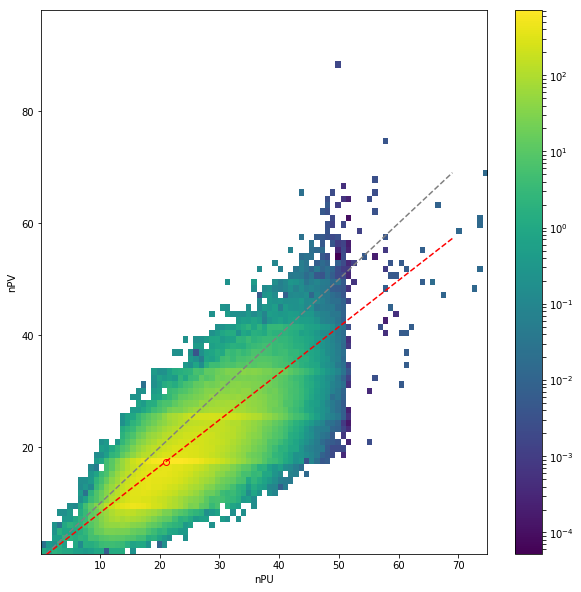

In [30]:
N = int(1e6)
nPU = ZG.GetWithCuts('nPU')[:N]
nPV = ZG.GetWithCuts('nPV')[:N]
W   = ZG.GetWithCuts('weight')[:N]

plt.figure(figsize=(10,10))
plt.hist2d(nPU,nPV,
           weights = W,
          bins = 85,
           norm = col.LogNorm(),
          );



plt.plot(np.bincount(np.array(nPU,dtype=np.int64)).argmax(),
         np.bincount(np.array(nPU,dtype=np.int64)).argmax()*0.83,
         color = 'r',marker='o',fillstyle='none')

plt.plot(np.arange(0,70),np.arange(0,70),
        color = 'grey',
         marker = '',
        linestyle = '--')
plt.plot(np.arange(0,70),np.arange(0,70)*0.83,
        color = 'r',
         marker = '',
        linestyle = '--')

plt.colorbar()
plt.xlabel('nPU')
plt.ylabel('nPV');

In [31]:
if weightCorrection:
    reWeight = []
    puWeight = SF_ratio(xsec1=xsec1,xsec2=xsec2)
    for i in range(len(data[:-1])):
        reWeight.append(data[i].weight*puWeight[i])

/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


-------------- WWTo2L2Nu
366502
-------------- DYJets
304953
-------------- ZGToLLG
854401


In [32]:
for d in data:
    print('--------'+d.name+'--------')
    print(d.ScaleFactor())
    print(len(d.cuts),sum(d.cuts),d.N())

--------WWTo2L2Nu--------
0.012522585493077854
366502 311989 34933530.0
--------DYJets--------
2.6462412759394023
304953 202065 80677311.0
--------ZGToLLG--------
0.212436538464181
854401 533915 8004967.0
--------DoubleMuon_2016--------
1
407015 332398 175050042.0


# CSV Yields

In [33]:
#dataY = [Leptons, DYJets, ZG, TT, W1Jets , W2Jets , W3Jets, W4Jets , WWTo2L2Nu , ZZTo2L2Nu , ZZTo2L2Q , ZZTo4L,  WZTo2L2Q, WZTo3LNu , WWTo2L2Nu , ZZTo2L2Nu , ZZTo2L2Q , ZZTo4L , WZTo2L2Q , WZTo3LNu]
dataY = [Leptons, DYJets, ZG, TT, WJets , WWTo2L2Nu , ZZTo2L2Nu , ZZTo2L2Q , ZZTo4L,  WZTo2L2Q, WZTo3LNu , WWTo2L2Nu , ZZTo2L2Nu , ZZTo2L2Q , ZZTo4L , WZTo2L2Q , WZTo3LNu]
legendY = [d.name for d in data]

In [34]:
xsec = {}
xsec[dataY[0].name] = 1
for d in dataY[1:]:
    xsec[d.name] = d.Topo._GetXsec(d.name)

In [35]:
ticks  = ['xsec','Events', 'LumiMask','Trig','Good PV','LeptonMult','GmMult','LeptonSel', 'GmSel']
df = pd.DataFrame()
df["Cut"] = ticks
for d in dataY:
    #if j != 0 : break
    Event = np.array(d.TotalEvent)
    Event[0] = xsec[d.name]
    print(d.name)
    for e,t in zip(Event[:],ticks):
        print("      ",t,": ",e)
    
    df[d.name] = Event[:len(ticks)]

DoubleMuon_2016
       xsec :  1.0
       Events :  175050042.0
       LumiMask :  169944320.0
       Trig :  97126546.0
       Good PV :  97103253.0
       LeptonMult :  31961107.0
       GmMult :  1265957.0
       LeptonSel :  935702.0
       GmSel :  768660.0
DYJets
       xsec :  5943.2
       Events :  120408807.0
       LumiMask :  120408807.0
       Trig :  17489336.0
       Good PV :  17489331.0
       LeptonMult :  15265974.0
       GmMult :  702598.0
       LeptonSel :  661009.0
       GmSel :  532246.0
ZGToLLG
       xsec :  47.34
       Events :  13142387.0
       LumiMask :  13142387.0
       Trig :  3204006.0
       Good PV :  3204005.0
       LeptonMult :  1845616.0
       GmMult :  1427684.0
       LeptonSel :  1301720.0
       GmSel :  959209.0
TTTo2L2Nu
       xsec :  87
       Events :  0
       LumiMask :  0
       Trig :  0
       Good PV :  0
       LeptonMult :  0
       GmMult :  0
       LeptonSel :  0
       GmSel :  0
WJets
       xsec :  61526
       Events 

In [36]:
#print(df[dataY[0].name][8])
for d in dataY:
    #print(df[d.name][8],len(d.GetWithCuts('weights')))
    df[d.name][8] = len(d.GetWithCuts('weights'))


/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [37]:
df

,Cut,DoubleMuon_2016,DYJets,ZGToLLG,TTTo2L2Nu,WJets,WWTo2L2Nu,ZZTo2L2Nu,ZZTo2L2Q,ZZTo4L,WZTo2L2Q,WZTo3LNu
0,xsec,1.0,5943.2,47.34,87,61526,12,0,3.22,1.212000e+00,5.595000e+00,4.429650e+00
1,Events,175050042.0,120408807.0,13142387.00,0,0,0,0,15345161.00,1.070955e+07,2.649668e+07,1.988154e+06
2,LumiMask,169944320.0,120408807.0,13142387.00,0,0,0,0,15345161.00,1.070955e+07,2.649668e+07,1.988154e+06
3,Trig,97126546.0,17489336.0,3204006.00,0,0,0,0,2275447.00,1.824602e+06,3.563998e+06,2.116160e+05
4,Good PV,97103253.0,17489331.0,3204005.00,0,0,0,0,2275446.00,1.824602e+06,3.563997e+06,2.116160e+05
5,LeptonMult,31961107.0,15265974.0,1845616.00,0,0,0,0,1887593.00,1.593550e+06,2.971186e+06,1.832210e+05
6,GmMult,1265957.0,702598.0,1427684.00,0,0,0,0,202607.00,1.794490e+05,3.288450e+05,1.675400e+04
7,LeptonSel,935702.0,661009.0,1301720.00,0,0,0,0,183257.00,1.454340e+05,2.938150e+05,1.396800e+04
8,GmSel,332398.0,202065.0,533915.00,0,0,0,0,104057.00,8.572400e+04,1.682530e+05,8.468000e+03


In [38]:
df.to_csv(figpath+"CutFlow_"+selection+".csv")

/home/jcordero/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


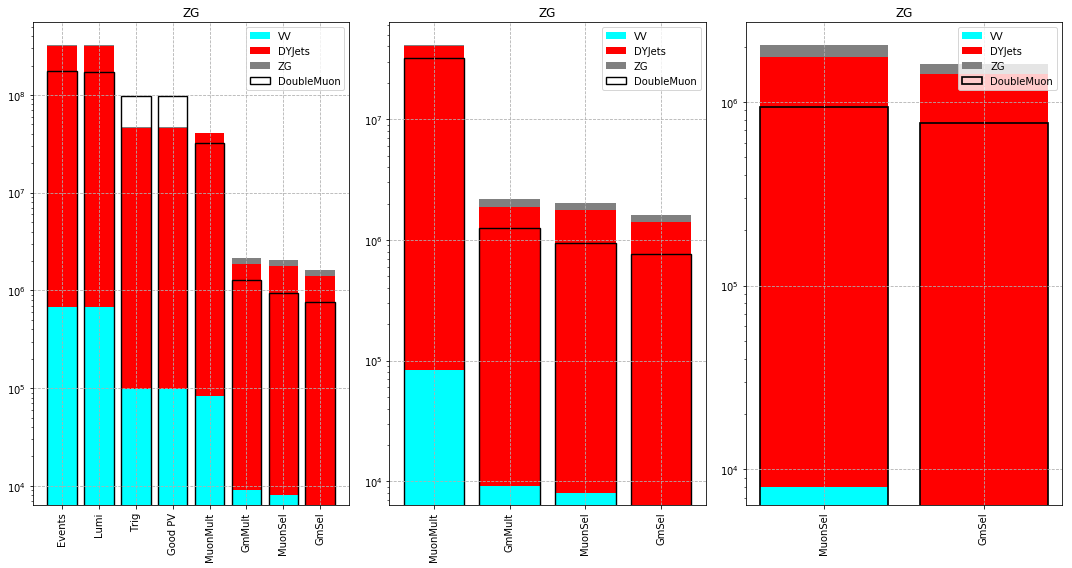

In [39]:
CutFlow(log=True)

# TEST

----------------nPV----------------


/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


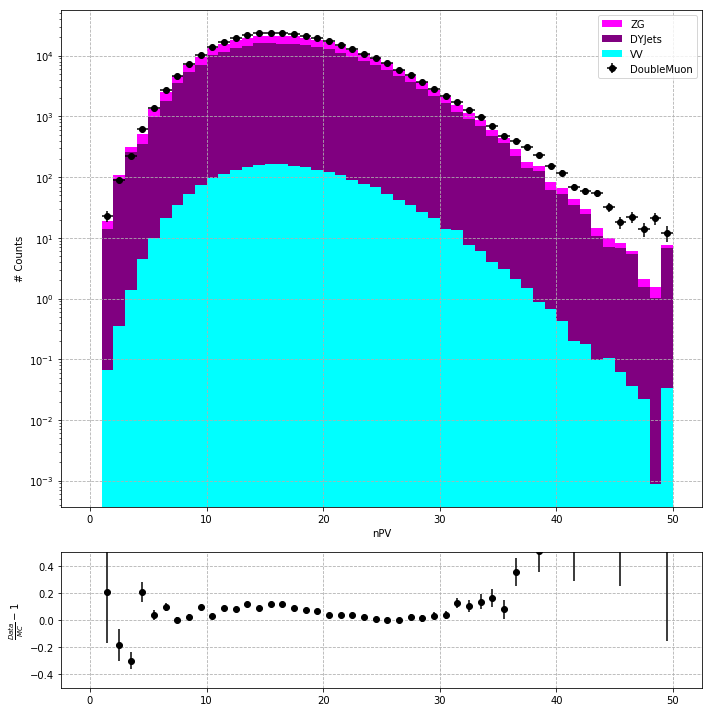

----------------M----------------


/home/jcordero/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jcordero/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in multiply


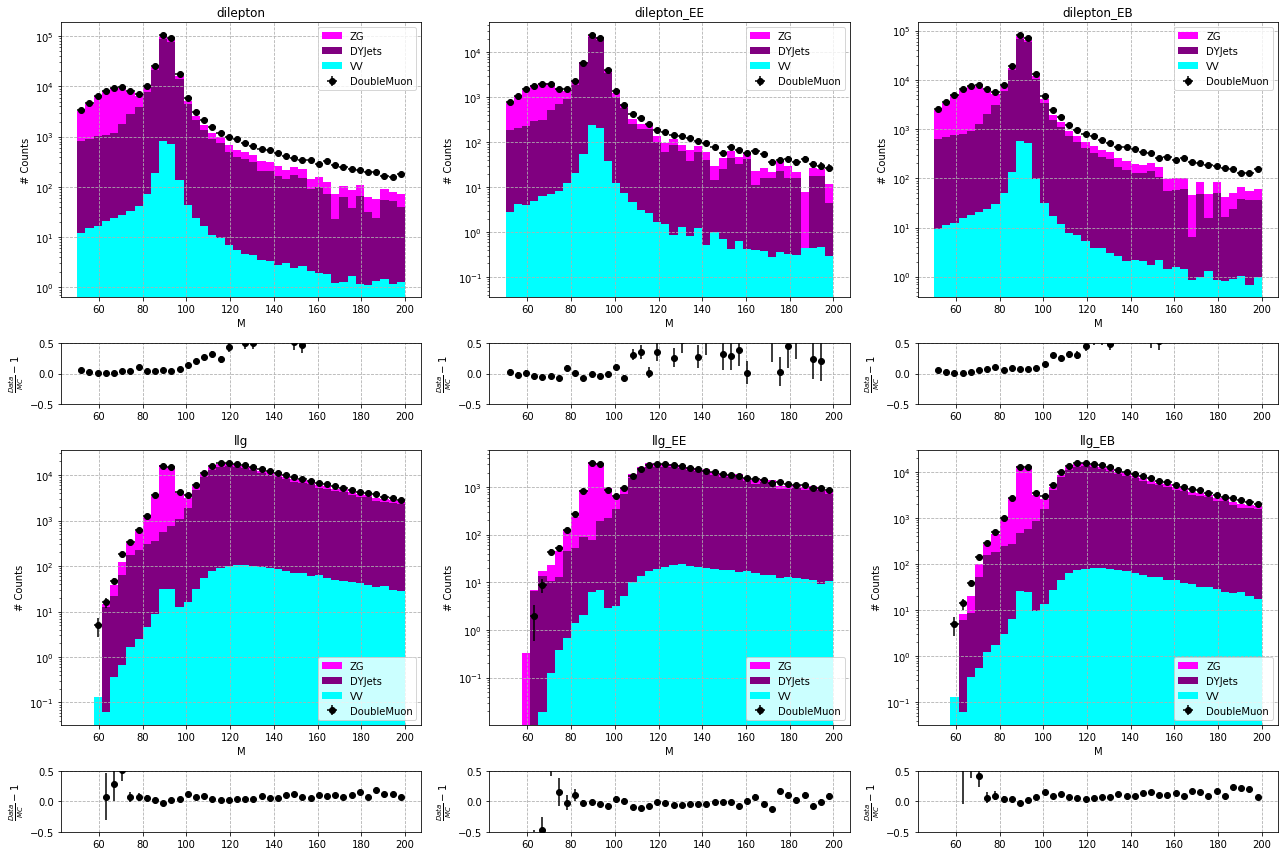

In [40]:
###############################
var = ['nPV']
for v in var:
    print('----------------'+str(v)+'----------------')
    Plot(
        var              = v,
        part             = '',
        signalInclude    = True,
        stacked          = stacked,
        density          = density,
        log              = log,
        weightCorrection = weightCorrection,
        )
    
############################### 
var = ['M']    
part = [
        'dilepton','dilepton_EE','dilepton_EB',
        'llg','llg_EE','llg_EB'
       ]
for v in var:
    print('----------------'+str(v)+'----------------')
    Plot_Mult(var              = v,
              part             = part,
              signalInclude    = True,
              figDim           = [2,3],
              customRange      = customRange,
              stacked          = stacked,
              log              = log,
              weightCorrection = weightCorrection,
             )    
###############################

In [41]:
for k in ZG.df.keys():
    print(k)

runNumber
evtNumber
lumiSection
triggerStatus
nPV
nPU
nPartons
xPV
yPV
zPV
met
metPhi
metNC
metPhiNC
ht
htPhi
htSum
genWeight
eventWeight
puWeight
triggerWeight
elIDWeightOne
elIDWeightTwo
elTrigWeightOne
elTrigWeightTwo
muonIDWeightOne
muonIDWeightTwo
muonTrigWeightOne
muonTrigWeightTwo
photonIDWeight
Sgen
SgenAccep
leptonOnePt
leptonOneEta
leptonOnePhi
leptonOnePtKin
leptonOnePtKinJames
leptonOneIso
leptonOneFlavor
leptonOneMother
leptonOneD0
leptonOneDZ
leptonOneRecoWeight
leptonOneECALDriven
leptonOneCharge
leptonOneTag
leptonTwoPt
leptonTwoEta
leptonTwoPhi
leptonTwoPtKin
leptonTwoPtKinJames
leptonTwoIso
leptonTwoFlavor
leptonTwoMother
leptonTwoD0
leptonTwoDZ
leptonTwoRecoWeight
leptonTwoECALDriven
leptonTwoCharge
leptonTwoTag
tauDecayMode
tauMVA
isLeptonTag
isDijetTag
isTightDijetTag
photonOnePt
photonOneEta
photonOnePhi
photonOneR9
photonOneMVA
photonOneERes
passElectronVeto
photonOneSieie
photonOneHoverE
photonOneIneu
photonOneIph
photonOneIch
jetOnePt
jetOneEta
jetOnePhi
jetOne

In [42]:
#var       = 'photonOnePreShowerE'
var       = 'photonOnePreShowerE_EB'
ranges    = [0,20]
bins      = 100
histtype  = 'step'
stacked   = True
linewidth = 1.3

#VAR = getattr(ZG.df,var)
VAR = getattr(DYJets.df,var)
h_bg = plt.hist(
                VAR,
                range     = ranges,
                bins      = bins,
                histtype  = histtype,
                stacked   = stacked,
                #weights   = wei[:-N],
                #label     = legend[:-N],
                #color     = colors[:-N],
                #density   = density,
                linewidth = linewidth,
                )

AttributeError: 'DataFrame' object has no attribute 'photonOnePreShowerE_EB'

In [ ]:
############################### 
var = ['Sipip']    
part = [
        'photonOne','photonOne_EE','photonOne_EB',
       ]
for v in var:
    print('----------------'+str(v)+'----------------')
    Plot_Mult(var              = v,
              part             = part,
              signalInclude    = True,
              figDim           = [2,3],
              customRange      = customRange,
              stacked          = stacked,
              log              = log,
              weightCorrection = weightCorrection,
             )    
###############################

# Single Graphs

In [ ]:
if LOG == 'both':
    for log in [True,False]:
        ###############################    
        if log:
            stackFol = Fol+'/log'
        else:
            stackFol = Fol+'/linear'
        ###############################    
        Single_Ploting(stacked,log,weightCorrection)
else:
    Single_Ploting(stacked,log,weightCorrection)

# Multi Graphs

In [ ]:

if LOG == 'both':
    for log in [True,False]:
        ###############################    
        if log:
            stackFol = Fol+'/log'
        else:
            stackFol = Fol+'/linear'
        ###############################    
        Multi_Ploting(stacked,log,customRange,weightCorrection)
else:
    Multi_Ploting(stacked,log,customRange,weightCorrection)

In [ ]:
min(ZG.df.photonOnePt)

# Exploring 2D hists

In [ ]:
def Hist2D(X,Y,W,
          xrange,yrange):
    fig = plt.figure(figsize=(8,10))

    #plt.subplot(2,1,1)
    plt.hist2d(X,Y,
              range=[xrange,yrange],
              #bins = 30,
              norm=col.LogNorm(),
              #norm=col.LogNorm,
              weights = W,
              #cmap = 'Blues'#'Reds'#'cool'#'jet'#'RdYlGn'
              )
    plt.title('DYJets',fontsize=20)
    ax = plt.gca()
    ax.set_xlabel(xvar,fontsize = 20)
    ax.set_ylabel(yvar,fontsize = 20)
    #plt.colorbar()

In [ ]:
#xpart, xvar, xrange = 'photonOne', 'Sieie' , [0.,0.031]
#xpart, xvar, xrange = 'photonOne', 'HoverE', [0.005,0.1]
#xpart, xvar, xrange = 'photonOne', 'Ich'   , [0.1,3]
#xpart, xvar, xrange = 'photonOne', 'Ineu'  , [0.1,0.4]
#xpart, xvar, xrange = 'photonOne', 'Iph'   , [0.1,5]
#xpart, xvar, xrange = 'photonOne', 'R9'    , [0.005,0.1]
xpart, xvar, xrange = 'photonOne', 'MVA'   , [-1,1]


#ypart, yvar, yrange = 'dilepton'      , 'DR' , [0,6]
#ypart, yvar, yrange = 'dileptonPhoton', 'DR' , [0,6]
#ypart, yvar, yrange = 'dilepton'      , 'M'  , [30,150]
#ypart, yvar, yrange = 'leptonTwo'     , 'Pt' , [0,60]
ypart, yvar, yrange = 'photonOne'     , 'Ich' , [0,60] 

X = [d.GetWithCuts(xpart+xvar) for d in data]
Y = [d.GetWithCuts(ypart+yvar) for d in data]
W = [d.GetWithCuts('weight')   for d in data]

ph = ""

N = 0
xrange = Help.plotOpsAll[N]['range'][xvar][xpart]
yrange = Help.plotOpsAll[N]['range'][yvar][ypart]
Hist2D(X[N],Y[N],W[N],xrange,yrange)

N = -2
xrange = Help.plotOpsAll[N]['range'][xvar][xpart]
yrange = Help.plotOpsAll[N]['range'][yvar][ypart]
Hist2D(X[N],Y[N],W[N],xrange,yrange)


In [ ]:
ZGnum = len(ZG.GetWithCuts('weight'))
DYnum = len(DYJets.GetWithCuts('weight'))
print(ZGnum,DYnum,ZGnum/DYnum)


In [ ]:
M2 = [d.GetWithCuts('dileptonM') for d in data]
M3 = [d.GetWithCuts('llgM') for d in data]

import matplotlib.colors as col
fig = plt.figure(figsize=(8,10))

plt.subplot(2,1,1)
plt.hist2d(M2[0],M3[0],
          range=[[50,110],[50,300]],
          bins = 100,
          norm=col.LogNorm(),
          cmap = 'winter'#'Reds'#'cool'#'jet'#'RdYlGn'
          )
plt.title('DYJets',fontsize=20)
ax = plt.gca()
ax.set_xlabel(r'$M_{\mu \mu}$',fontsize = 20)
ax.set_ylabel(r'$M_{\mu \mu \gamma}$',fontsize = 20)
plt.colorbar()


plt.subplot(2,1,2)
plt.hist2d(M2[-2],M3[-2],
          range=[[50,110],[50,300]],
          bins = 100,
          norm=col.LogNorm(),
          cmap = 'PuRd'#'Blues'#'cool'#'jet'#'RdYlGn'
          )
plt.title('ZG_ZToLL',fontsize=20)
ax = plt.gca()
ax.set_xlabel(r'$M_{\mu \mu}$',fontsize = 20)
ax.set_ylabel(r'$M_{\mu \mu \gamma}$',fontsize = 20)
plt.colorbar()
plt.tight_layout()
plt.show()

fig.savefig(figpath+stackFol+'/dilep_dilepgm.png')

# Some Notes

In [ ]:
Ztoll = 0.1
DYxsec = 5943.2*(Ztoll)
ZGxsec = 117
print(round(ZGxsec/DYxsec,2))

In [ ]:
print('---Fiducial Cuts---')
print('Total Sample:: ',len(np.array(DYJets.df.vetoDY) ))
print('Real Photons:: ',sum(np.array(DYJets.df.vetoDY) ))
print('---')
print('Ph/T:: ',round( sum(np.array(DYJets.df.vetoDY))/len(np.array(DYJets.df.vetoDY)) ,3))


In [ ]:
FSR,ISR = [],[]
FSRsum, ISRsum = 0,0
for d in data[:-1]:
    FSR.append(np.array(d.GetWithCuts('dileptonM')) + np.array(d.GetWithCuts('llgM')) < 185)
    FSRsum += sum(FSR[-1])
    ISR.append(np.logical_not(np.array(d.GetWithCuts('dileptonM')) + np.array(d.GetWithCuts('llgM')) < 185))
    ISRsum += sum(ISR[-1])

In [ ]:
print('FSR    :: ',FSRsum)
print('ISR    :: ',ISRsum)
print('ISR/FSR:: ',round(ISRsum/FSRsum,2))

In [ ]:
print("--------------")

In [52]:
for k in ZG.df.keys():
    if "DEta" == k[-4:]:
        print(k)

dileptonDEta
dijetDEta
l1j1DEta
l1j2DEta
l2j1DEta
l2j2DEta
j1PhotonDEta
j2PhotonDEta
l1PhotonDEta
l2PhotonDEta
dileptonPhotonDEta
llgJJDEta


In [51]:
ZG.df.keys()

Index(['runNumber', 'evtNumber', 'lumiSection', 'triggerStatus', 'nPV', 'nPU',
       'nPartons', 'xPV', 'yPV', 'zPV',
       ...
       'zgBigThetaJames_EB', 'zgLittleThetaJames_EB', 'zgPhiJames_EB',
       'genBigTheta_EB', 'genLittleTheta_EB', 'genPhi_EB', 'llgJJDEta_EB',
       'llgJJDPhi_EB', 'llgJJDR_EB', 'zepp_EB'],
      dtype='object', length=528)